## The Data

The first dataset is one from kaggle (https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset), comprised of recent real estate listings from across the United States.

In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
def catpieplot(data, feature):
    fets = []
    tot = 0
    for f in data[feature]:
        fets.append(f)
        tot += 1
    fets_set = set(fets)
    
    per = []
    cent = 0
    for fet in fets_set:
        for p in data[feature]:
            if(p==fet):
                cent += 1
        per.append(cent / tot)
        
    colors = sns.color_palette('bright')
    
    plt.pie(x = per, labels = fets_set, colors = colors,
           autopct = '%.0f%%')
    plt.title(f"'{feature}' Pieplot")
    plt.show()
        

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Jupyter
# df = pd.read_csv("./dataset/realtor-data.csv")
import pandas as pd 
import numpy as NP
# Google Colab
df = pd.read_csv("/content/data/realtor-data.csv")
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
#filter data
filter_mask = [city == "Philadelphia"  or city == "New York" for city in df["city"]]

#date >= dt.strptime("2018-09-01", "%Y-%m-%d") for date in AAPL["Date"]

df = df[filter_mask].copy()
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
465089,for_sale,1185000.0,2.0,2.0,NaN,"175 E 74th St Apt 7C, New York, NY, 10021",175 E 74th St Apt 7C,New York,New York,10021.0,NaN,NaN
465111,for_sale,29995000.0,12.0,14.0,NaN,"271 W 11th St, New York, NY, 10014",271 W 11th St,New York,New York,10014.0,8528.0,NaN
465513,for_sale,895000.0,2.0,2.0,NaN,"440 E 56th St Unit 4G, New York, NY, 10022",440 E 56th St Unit 4G,New York,New York,10022.0,1425.0,NaN
465515,for_sale,985000.0,1.0,2.0,NaN,"55 Wall St Apt 626, New York, NY, 10005",55 Wall St Apt 626,New York,New York,10005.0,1166.0,2014-01-10
465516,for_sale,810000.0,1.0,1.0,NaN,"304 E 65th St Apt 3C, New York, NY, 10065",304 E 65th St Apt 3C,New York,New York,10065.0,761.0,2020-08-18


##### EDA

In [ ]:
df.shape

(57778, 12)

In [ ]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,5.777800e+04,50791.000000,56258.000000,9508.000000,57776.000000,37209.000000
mean,2.246505e+06,2.383336,2.065751,0.043129,11752.360253,1617.685829
std,4.260792e+06,1.484543,1.454330,0.096029,3473.777959,1657.549531
min,0.000000e+00,1.000000,1.000000,0.000000,10001.000000,199.000000
25%,5.250000e+05,1.000000,1.000000,0.020000,10016.000000,845.000000
50%,9.750000e+05,2.000000,2.000000,0.030000,10025.000000,1226.000000
75%,2.305000e+06,3.000000,3.000000,0.040000,10282.000000,1894.000000
max,1.350000e+08,24.000000,19.000000,3.000000,19154.000000,74340.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57778 entries, 465089 to 921687
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        57778 non-null  object 
 1   price         57778 non-null  float64
 2   bed           50791 non-null  float64
 3   bath          56258 non-null  float64
 4   acre_lot      9508 non-null   float64
 5   full_address  57778 non-null  object 
 6   street        57758 non-null  object 
 7   city          57778 non-null  object 
 8   state         57778 non-null  object 
 9   zip_code      57776 non-null  float64
 10  house_size    37209 non-null  float64
 11  sold_date     33279 non-null  object 
dtypes: float64(6), object(6)
memory usage: 5.7+ MB


Data Features:
* status: object, Categorical
* price: float, Numerical - Continuous
* bed: float, Numerical - Discrete
* bath: float, Numerical - Discrete
* acre_lot: float, Numerical - Continuous
* full_address: object, 
* street: object
* city: object,
* state: object
* zip_code: float,
* house_size: float, Numerical - Continuous
* sold_date: object, 

In [ ]:
# Unique Values
for x in list(df.columns):
    print("For column", x,"the unique values are",
          df[x].nunique())

For column status the unique values are 2
For column price the unique values are 1919
For column bed the unique values are 19
For column bath the unique values are 18
For column acre_lot the unique values are 60
For column full_address the unique values are 10488
For column street the unique values are 10477
For column city the unique values are 2
For column state the unique values are 2
For column zip_code the unique values are 150
For column house_size the unique values are 2301
For column sold_date the unique values are 3908


In [ ]:
# How many NaN's in each feature
df.isnull().sum()

status              0
price               0
bed              6987
bath             1520
acre_lot        48270
full_address        0
street             20
city                0
state               0
zip_code            2
house_size      20569
sold_date       24499
dtype: int64

Text(0.5, 1.0, "Barplot of non-NaN's")

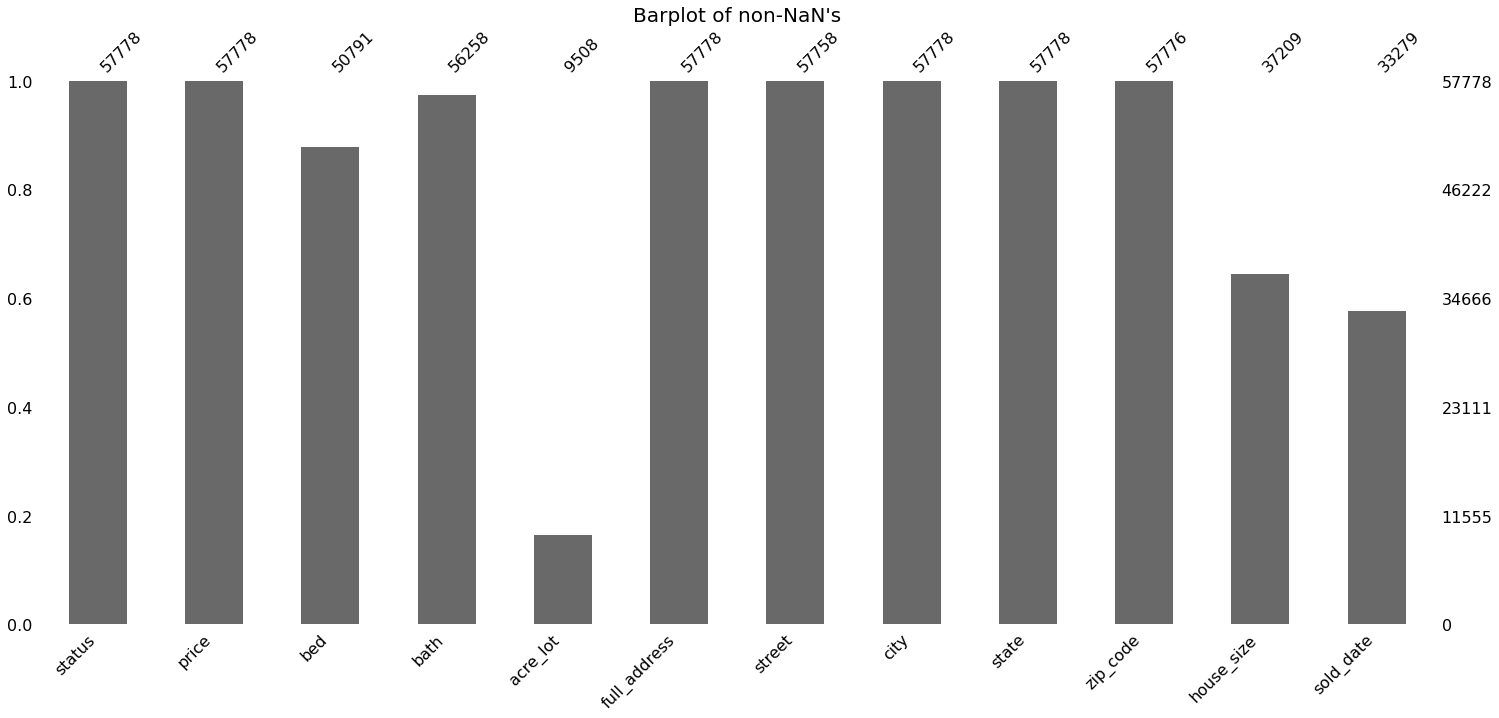

In [ ]:
# Bar plot of NaN's
plt.rc("axes", titlesize=20)
msno.bar(df)
plt.title("Barplot of non-NaN's")

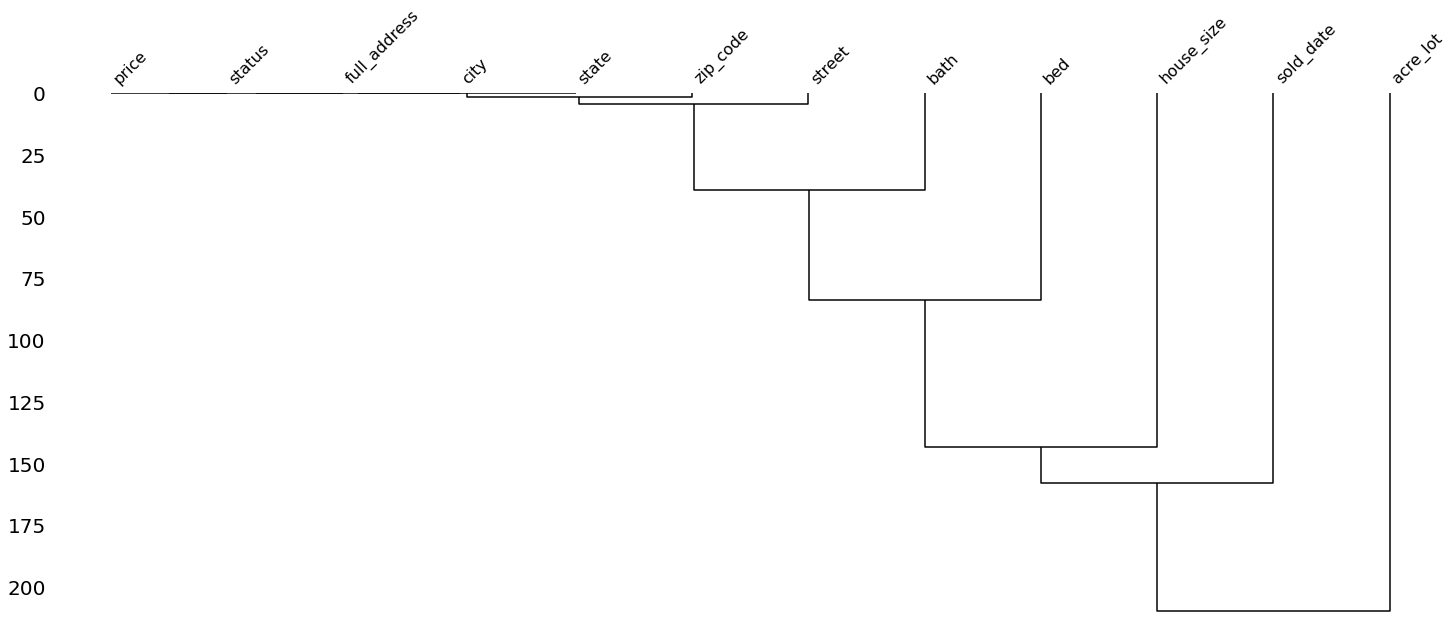

In [ ]:
msno.dendrogram(df)

Text(0.5, 1.0, 'Status Histogram')

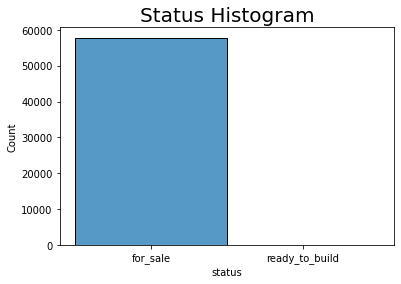

In [ ]:
# status visualizations
sns.histplot(data=df,x='status')
plt.title("Status Histogram")

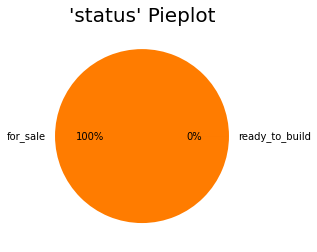

In [ ]:
catpieplot(df, 'status')

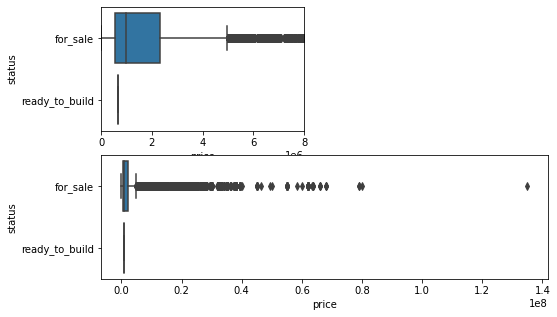

In [ ]:
fig = plt.figure(figsize=(8,5))
plot1 = fig.add_subplot(2,2,1)
plot1 = sns.boxplot(data=df,y='status',x='price')
plot1.set_xlim(0,8000000)

plot3 = fig.add_subplot(2,2,(3,4))
plot3 = sns.boxplot(data=df,y='status',x='price')

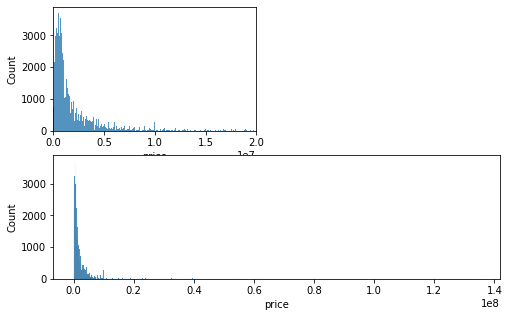

In [ ]:
# price visualizations
fig = plt.figure(figsize=(8,5))
plot1 = fig.add_subplot(2,2,1)
plot1 = sns.histplot(data=df,x='price')
plot1.set_xlim(0,20000000)

plot2 = fig.add_subplot(2,2,(3,4))
plot2 = sns.histplot(data=df,x='price')

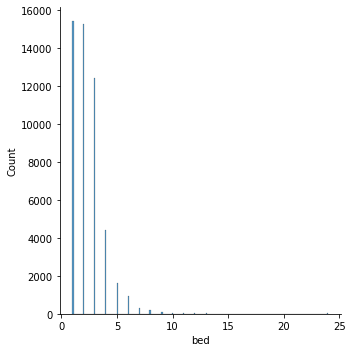

In [ ]:
sns.displot(data=df,x='bed')

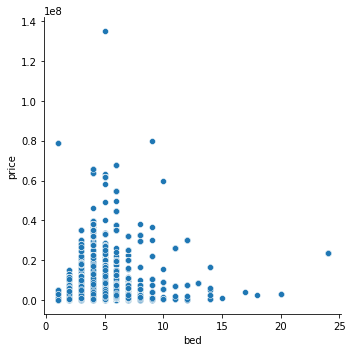

In [ ]:
sns.relplot(data=df,x='bed',y='price')

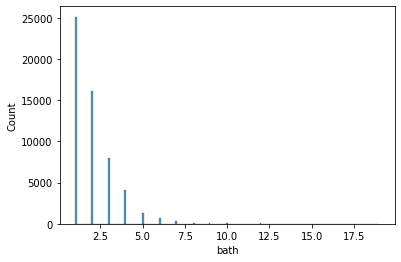

In [ ]:
sns.histplot(data=df,x='bath')

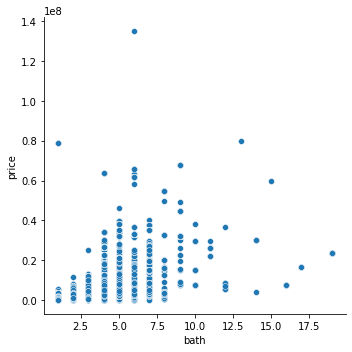

In [ ]:
sns.relplot(data=df,x='bath',y='price')

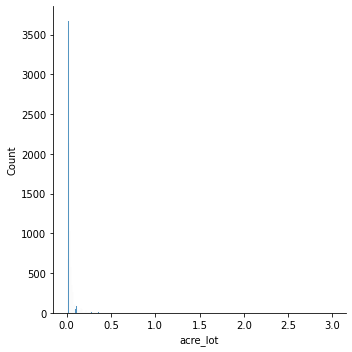

In [ ]:
sns.displot(data=df,x='acre_lot')

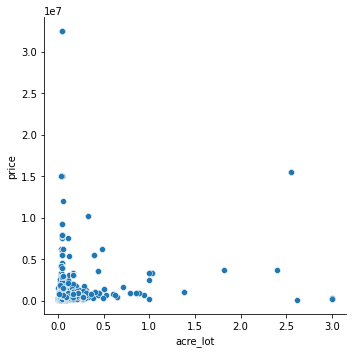

In [ ]:
sns.relplot(data=df,x='acre_lot',y='price')

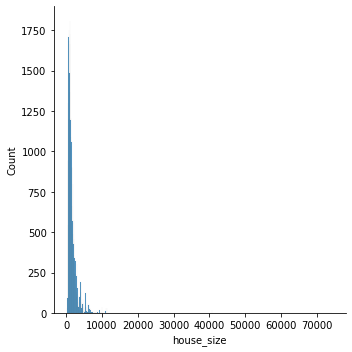

In [ ]:
sns.displot(data=df,x='house_size')

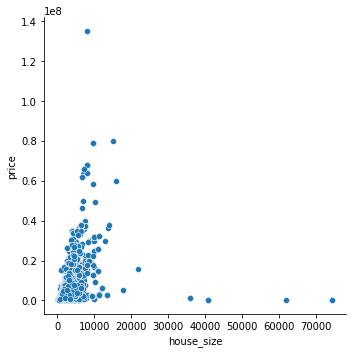

In [ ]:
sns.relplot(data=df,x='house_size',y='price')

Some more data visualization and exploration was done on this dataset using non-Python software, such as Talbeau. Below are those visualizations

In [ ]:
from IPython.display import Image
Image(r".\images\Avg Price vs Cities Bar.png")

In [ ]:
Image(r".\images\Avg Price vs Cities Geo.png")

In [ ]:
Image(r".\images\New York City Heat Map.png")

In [ ]:
Image(r".\images\Philadelphia Heat Map.png")

In [ ]:
Image(r".\images\NY vs PA Sold Date vs Price.png")

In [ ]:
Image(r".\images\NYC vs Phili Sold Date vs Price.png")

In [ ]:
Image(r".\images\NY vs PA Bar Bath.png")

In [ ]:
Image(r".\images\NY vs PA Bar Bed.png")

In [ ]:
Image(r".\images\NY vs PA Price Bar.png")

In [ ]:
Image(r".\images\NY Vs Phili Bar (Bath).png")

In [ ]:
Image(r".\images\NY Vs Phili Bar (Bed).png")

In [ ]:
Image(r".\images\NYC Vs Phili Bar (Bed).png")

In [ ]:
Image(r".\images\NYC vs Phili Price Bar.png")

In [ ]:
# First we create a function to calculate all needed statistics for a feature and then return the dictionary
import scipy.stats

def get_statistics(df, feature):
    statistics = {}
    mean = np.mean(df[feature])
    stddev = np.std(df[feature])
    fifty_percentile = np.percentile(df[feature], 50)
    statistics['Mean'] = mean
    statistics['Standard Deviation'] = stddev
    statistics['50th Percentile'] = fifty_percentile
    return statistics

# Now we write a function that calculates the pearson correlation for two features
def pearson(df, feature1, feature2):
    x = df[feature1]
    y = df[feature2]
    return scipy.stats.pearsonr(x,y)
     

In [ ]:
# Gathering statistics for all the continuous values in our dataset
price_stats = get_statistics(df, 'price')
print("Price Statistics")
print(f'Mean: {price_stats["Mean"]:.2f}')
print(f'Standard Deviation: {price_stats["Standard Deviation"]:.2f}')
print(f'50th Percentile: {price_stats["50th Percentile"]:.2f}')
print()

acre_stats = get_statistics(df, 'acre_lot')
print("Acre Lot Statistics")
print(f'Mean: {acre_stats["Mean"]:.2f}')
print(f'Standard Deviation: {acre_stats["Standard Deviation"]:.2f}')
print(f'50th Percentile: {acre_stats["50th Percentile"]:.2f}')
print()

house_size_stats = get_statistics(df, 'house_size')
print("House Size Statistics")
print(f'Mean: {house_size_stats["Mean"]:2f}')
print(f'Standard Deviation: {house_size_stats["Standard Deviation"]:.2f}')
print(f'50th Percentile: {house_size_stats["50th Percentile"]:.2f}')

Price Statistics
Mean: 884122.52
Standard Deviation: 2623743.61
50th Percentile: nan

Acre Lot Statistics
Mean: 17.08
Standard Deviation: 962.32
50th Percentile: nan

House Size Statistics
Mean: 2141.644071
Standard Deviation: 3035.32
50th Percentile: nan


### Processing

In [ ]:
# Drop acre_lot column
filtered_df.drop('acre_lot', axis=1, inplace=True)

In [ ]:
filtered_df.head(10)

### Zillow Home Value Index

In [ ]:
tf = pd.read_csv("/content/sample_data/Zillow Home Value Index .csv")
tf.head()

In [ ]:
hf = pd.read_csv("/content/sample_data/RAW.csv")
hf.head()

##### EDA

In [ ]:
import matplotlib.pyplot as plt
tf.plot(subplots=True, figsize=(12, 15))

NameError: ignored

In [ ]:
hf.groupby('StateName')['2022-09-30'].sum().sort_values(ascending = False)

In [ ]:
hf.groupby('RegionName')['2022-09-30'].sum().sort_values(ascending = False)

In [ ]:

sns.relplot(data=hf,x='StateName',y='2022-09-30',kind="line",height=10,aspect=2)

In [ ]:
df2 = hf.query('RegionName =="San Francisco, CA"')

In [ ]:
df2

In [ ]:
df2.groupby(['RegionName']).mean()

In [ ]:
desired = [('2022-09-30'), 
           ('2022-07-31'), 
           ('2022-05-31')]

In [ ]:
flights_wide = hf.pivot("2022-09-30","2022-07-31","RegionName")
flights_wide.head()

In [ ]:
df2 = hf.query('RegionName =="San Francisco, CA"')

In [ ]:
df3 = hf.query('RegionName =="Philadelphia, PA"')

In [ ]:
df3

In [ ]:
# We can compute and visualize the price increase in Philadelphia between Jan 2020 and July 2022
df_philly = df3.transpose()
dates = df3.columns[5:]

prices = {}
count = 0
for row in df_philly[8][5:]:
    if (dates[count] == '2020-01-31'):
        break
    else:
        count += 1

for date in dates[count:]:
    prices[dates[count]] = df_philly[8][count]
    count += 1

months = range(33)
values = list(prices.values())

plt.scatter(months, values, color='blue')
COLOR = 'green'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.title("Mean Price Increase in Philadelphia from January 2020 to September 2022 by month")
plt.xlabel("Months Passed")
plt.ylabel("Mean Price")
plt.show()

In [ ]:
# We can perform the same kind of analysis on New York
df4 = hf.query('RegionName == "New York, NY"')
df4

In [ ]:
df_ny = df4.transpose()
dates = df4.columns[5:]

nyprices = {}
count = 0

for row in df_ny[1][5:]:
    if (dates[count] == '2020-01-31'):
        break
    else:
        count += 1

for date in dates[count:]:
    nyprices[dates[count]] = df_ny[1][count]
    count += 1

nyvalues = list(nyprices.values())

plt.scatter(months, nyvalues)
plt.title("Mean Price Increase in NYC from January 2020 to September 2022 by month")
COLOR = 'green'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.xlabel("Months Passed")
plt.ylabel("Mean Price")
plt.show()

NameError: ignored